(prob-input:univariate-distributions:lognormal)=
# Log-Normal Distribution

The log-normal distribution is a two-parameter continuous probability distribution.
A log-normal random variable is a variable whose (natural) logarithm is 
a {ref}`normally distributed <prob-input:univariate-distributions:normal>`
random variable.
The table below summarizes some important aspects of the distribution.

|                     |                                                                                                                                                                                          |
|--------------------:|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|        **Notation** | $X \sim \mathcal{N}_{\mathrm{log}} (\mu, \sigma)$                                                                                                                                        |
|      **Parameters** | $\mu \in \mathbb{R}$ (scale parameter)                                                                                                                                                   |
|                     | $\sigma > 0$ (shape parameter)                                                                                                                                                           |
| **{term}`Support`** | $\mathcal{D}_X = (0, \infty)$                                                                                                                                                            |
|     **{term}`PDF`** | $f_X (x; \mu, \sigma) = \begin{cases} 0 & x \leq 0 \\ \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[ - \frac{1}{2} \left(\frac{\log(x) - \mu}{\sigma} \right)^2 \right]} & x > 0 \end{cases}$ |
|     **{term}`CDF`** | $F_X (x; \mu, \sigma) = \begin{cases} 0 & x \leq 0 \\ \frac{1}{2} \left[ 1 + \mathrm{erf}\left( \frac{\log(x) - \mu}{\sigma \sqrt{2}}\right) \right] & x > 0 \end{cases}$                |
|    **{term}`ICDF`** | $F^{-1}_X (x) = \exp{\left[ \mu + \sqrt{2} \, \sigma \, \mathrm{erf}^{-1}(2 x - 1) \right]}$                                                                                             |


```{note}
There are various ways to parameterize the log-normal distribution.
In the parameterization adopted here, 
$\mu$ and $\sigma$ correspond to the mean and standard deviation of
the underlying normal distribution, respectively.
Under SciPy parameterization,
$e^\mu$ corresponds to the _scale_ parameter,
while $\sigma$ corresponds to the _shape_ parameter.
```

The plots of probability density function (PDF),
cumulative distribution function (CDF),
as well as the histogram of a sample ($5000$ points) for different parameter
values are shown below.

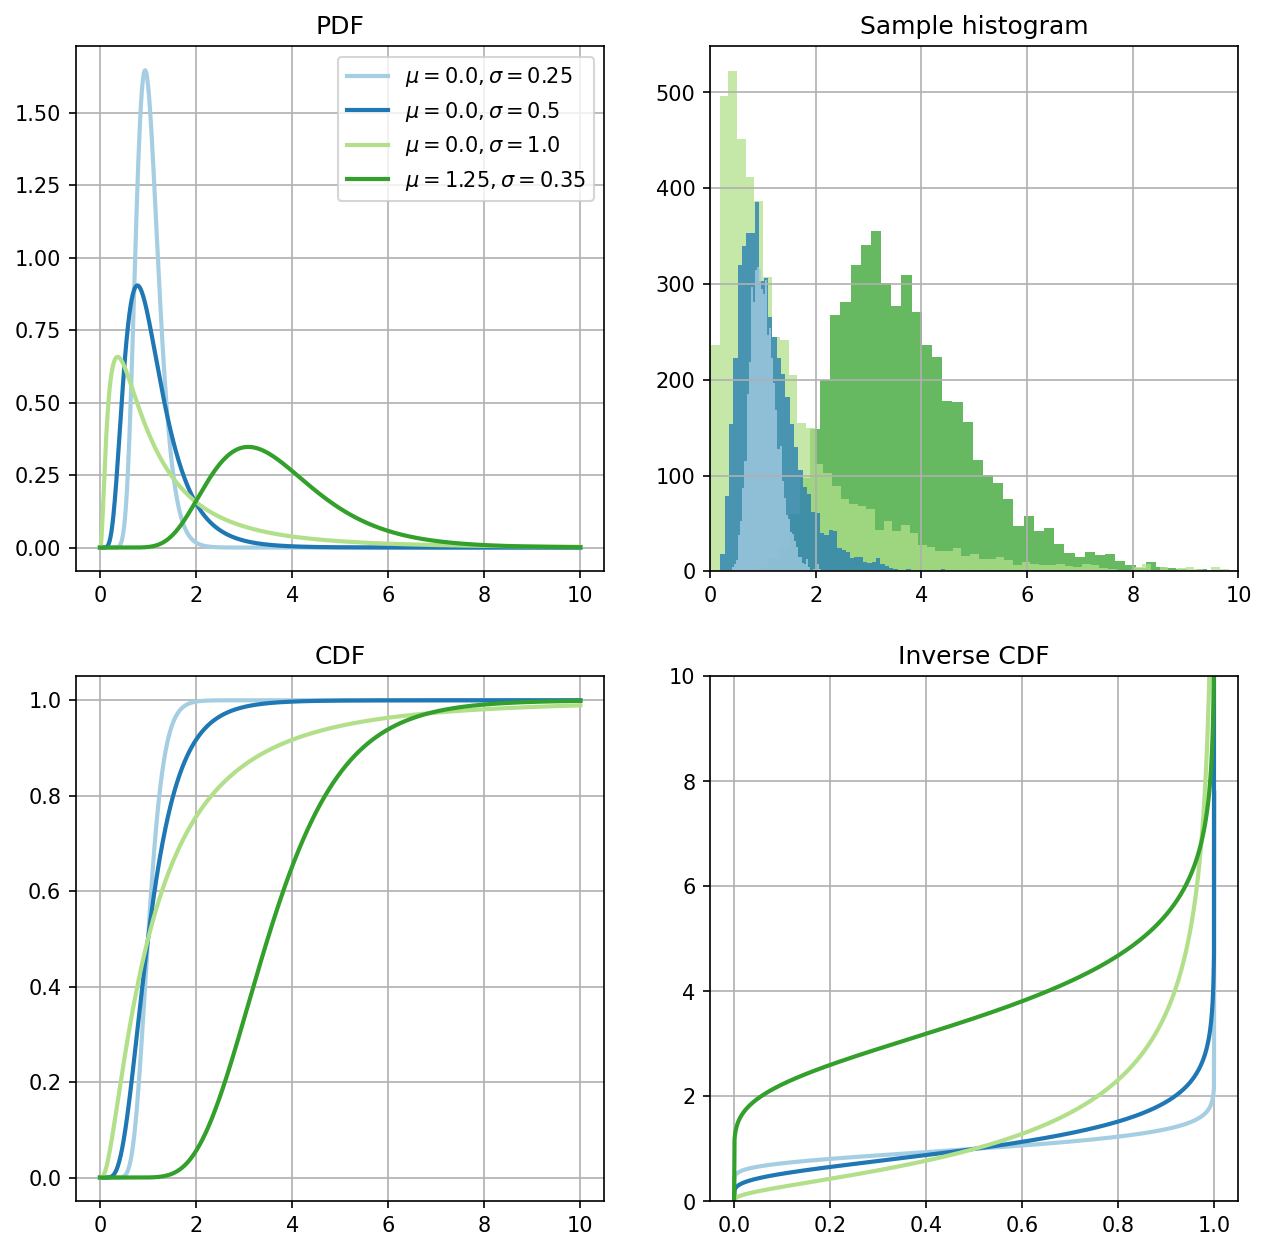

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

parameters = [[0, 0.25], [0, 0.5], [0, 1.0], [1.25, 0.35]]
colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"]

univ_dists = []
for parameter in parameters:
    univ_dists.append(
        uqtf.UnivDist(distribution="lognormal", parameters=parameter)
    )

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# --- PDF
xx = np.linspace(0, 10, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[0, 0].plot(
        xx,
        univ_dist.pdf(xx),
        color=colors[i],
        label=f"$\\mu = {univ_dist.parameters[0]}, \\sigma = {univ_dist.parameters[1]}$",
        linewidth=2,
    )
axs[0, 0].legend();
axs[0, 0].grid();
axs[0, 0].set_title("PDF");

# --- Sample histogram
sample_size = 5000
np.random.seed(42)
for col, univ_dist in zip(reversed(colors), reversed(univ_dists)):
    axs[0, 1].hist(
        univ_dist.get_sample(sample_size),
        color=col,
        label=f"mu = {univ_dist.parameters[0]}, beta={univ_dist.parameters[1]}",
        bins="auto",
        alpha=0.75
    )
axs[0, 1].grid();
axs[0, 1].set_xlim([0, 10]);
axs[0, 1].set_title("Sample histogram");

# --- CDF
xx = np.linspace(0, 10, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 0].plot(
        xx,
        univ_dist.cdf(xx),
        color=colors[i],
        label=f"mu = {univ_dist.parameters[0]}, beta={univ_dist.parameters[1]}",
        linewidth=2,
    )
axs[1, 0].grid();
axs[1, 0].set_title("CDF");

# --- Inverse CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 1].plot(
        xx,
        univ_dist.icdf(xx),
        color=colors[i],
        label=f"mu = {univ_dist.parameters[0]}, beta={univ_dist.parameters[1]}",
        linewidth=2
    )
axs[1, 1].grid();
axs[1, 1].set_ylim([0, 10]);
axs[1, 1].set_title("Inverse CDF");

plt.gcf().set_dpi(150)